Por gentileza, ler a documentação no GitHub:https://github.com/EricaBassan/TechChallenge3

Nela, explico a organização do banco de dados, analiso os gráficos desse notebook, e apresento outros gráficos realizados em ferramentas de BI.


 Além de apresentar a conclusão do projeto.

##**Conectando o projeto do BigQuery**

Inicialmente estaremos conectando o notebook ao Google BigQuery

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
!pip install google-cloud-bigquery

In [ ]:
from google.cloud import bigquery

In [ ]:
from google.colab import data_table

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!pip3 install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 101.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.4 MB/s eta 0:00:00


In [ ]:
project= 'scenic-cedar-403421'
location='US'
client = bigquery.Client(project = project, location = location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

# **EDA**

## Características da População

Vamos estudar as caracteríticas da população que responderam ao questionário do IBGE.
Inicialmente, estudaremos o perfil etário e de genero dos entrevistados.

In [ ]:
#Consultando os dados da população a respeito de genero e idade
query_genero_idade = """SELECT
CASE
  WHEN  A003 =1 THEN "Homem"
  WHEN A003= 2  THEN "Mulher"
END as Sexo,
A002 as Idade


FROM `scenic-cedar-403421.Tech_Challenge_3.tbl_pnad_covid` """
query_job = client.query(query_genero_idade)
results = query_job.result()

df_genero_idade = client.query(query_genero_idade).to_dataframe()

In [ ]:
df_genero_idade.head()

,Sexo,Idade
0,Mulher,80
1,Mulher,87
2,Mulher,80
3,Mulher,91
4,Homem,80


In [ ]:
#criando gráfico de genero x idade

<Axes: xlabel='Sexo', ylabel='Idade'>

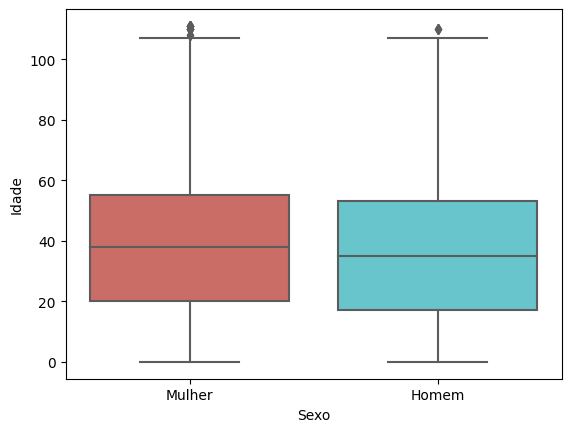

In [ ]:
sns.boxplot(x="Sexo", y="Idade", data=df_genero_idade, palette="hls")

Agora consultaremos do banco de dados, informações referente escolaridade e etnia dos entrevistados

In [ ]:
#consultando dados da população de escolaridade e etnia
query_escolaridade_etnia = """
SELECT
CASE
  WHEN  A005 =1 THEN "Sem instrucao"
  WHEN  A005 =2 THEN "Fundamental incompleto"
  WHEN  A005 =3 THEN "Fundamental completo"
  WHEN  A005 =4 THEN "Medio incompleto"
  WHEN  A005 =5 THEN "Medio completo"
  WHEN  A005 =6 THEN "Superior incompleto"
  WHEN  A005 =7 THEN "Superior completo"
  WHEN  A005 =8 THEN "Pos-graduacao, mestrado ou doutorado"
END as Escolaridade,
CASE
  WHEN A004=1 THEN "Branca"
  WHEN A004=2 THEN "Preta"
  WHEN A004 IN (3, 5) THEN "Amarela ou Indigena"
  WHEN A004=4 THEN "Parda"
END as Etnia
FROM `scenic-cedar-403421.Tech_Challenge_3.tbl_pnad_covid`  """

results = query_job.result()

df_escolaridade_etnia = client.query(query_escolaridade_etnia).to_dataframe()

In [ ]:
df_escolaridade_etnia.head()

,Escolaridade,Etnia
0,Sem instrucao,Branca
1,Sem instrucao,Parda
2,Sem instrucao,Parda
3,Sem instrucao,Branca
4,Sem instrucao,Parda


Criando o grafico escolaridade x etnia

In [ ]:
#Ordem da escolaridade
escolaridade_ordem = [
    "Sem instrucao",
    "Fundamental incompleto",
    "Fundamental completo",
    "Medio incompleto",
    "Medio completo",
    "Superior incompleto",
    "Superior completo",
    "Pos-graduacao, mestrado ou doutorado"
]

df_groupby_esc_etn = df_escolaridade_etnia.groupby(["Etnia", "Escolaridade"]).size().unstack().fillna(0)

# Reordenando o índice
df_groupby_esc_etn = df_groupby_esc_etn.reindex(columns=escolaridade_ordem)
df_groupby_esc_etn = df_groupby_esc_etn / 1000  # Convertendo para milhares


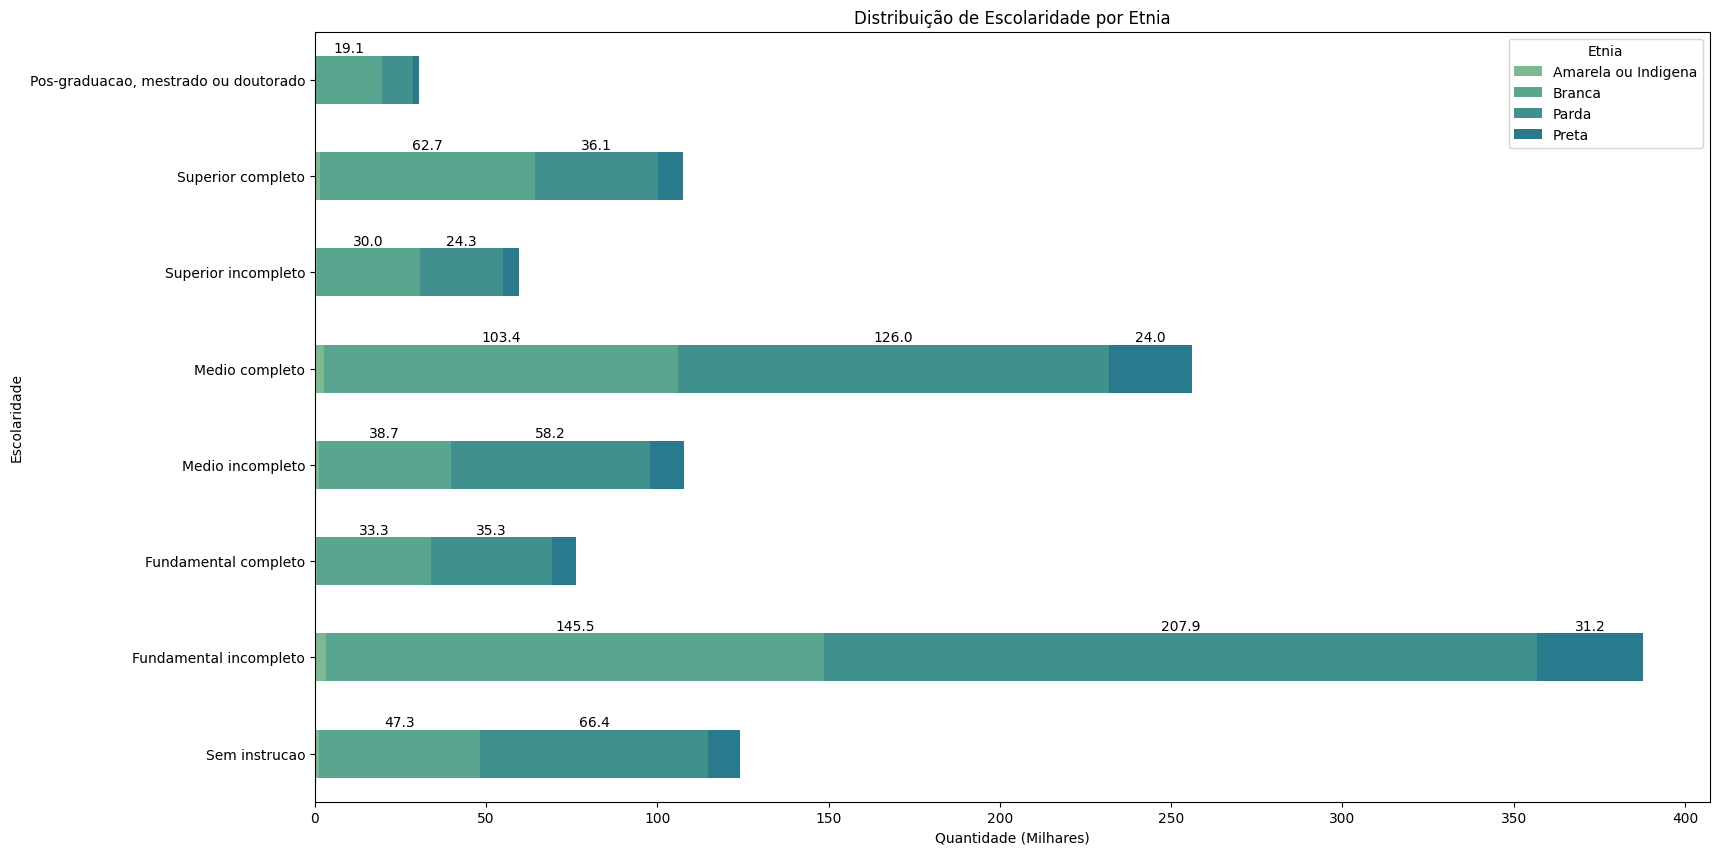

In [ ]:


# Plotando o gráfico

sns.set_palette("crest")

ax = df_groupby_esc_etn.T.plot(kind="barh", stacked=True, figsize=(18, 10))

plt.title("Distribuição de Escolaridade por Etnia")
plt.xlabel("Quantidade (Milhares)")
plt.ylabel("Escolaridade")

# Adicionando rótulos de dados
for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if width > 10:
        ax.annotate(f'{width:.1f}',(x + width / 2, y + height), ha='center', va='bottom')

plt.show()



Por fim, plotamos um gráfico de Região por Situação do domicilio

In [ ]:
#consultando dados da população de escolaridade e etnia
query_uf_situacao= """

SELECT
V1022 as Situacao_domicilio,
UF

FROM `scenic-cedar-403421.Tech_Challenge_3.tbl_pnad_covid` """

query_job = client.query(query_uf_situacao)
results = query_job.result()

df_uf_situacao = client.query(query_uf_situacao).to_dataframe()


In [ ]:
df_uf_situacao.head()

,Situacao_domicilio,UF
0,1,11
1,1,11
2,1,11
3,1,11
4,1,11


In [ ]:
#Alterando os dados da situação do domicilio e da UF

df_uf_situacao["Situacao_domicilio"] = df_uf_situacao["Situacao_domicilio"].astype(str)

df_uf_situacao["Situacao_domicilio"] = df_uf_situacao["Situacao_domicilio"].replace('1','Urbana')
df_uf_situacao["Situacao_domicilio"] = df_uf_situacao["Situacao_domicilio"].replace('2','Rural')


df_uf_situacao["UF"] = df_uf_situacao["UF"].astype(str)

df_uf_situacao["UF"] = df_uf_situacao["UF"].replace('11','Norte')
df_uf_situacao["UF"] = df_uf_situacao["UF"].replace('12','Norte')
df_uf_situacao["UF"] = df_uf_situacao["UF"].replace('13','Norte')
df_uf_situacao["UF"] = df_uf_situacao["UF"].replace('14','Norte')
df_uf_situacao["UF"] = df_uf_situacao["UF"].replace('15','Norte')
df_uf_situacao["UF"] = df_uf_situacao["UF"].replace('16','Norte')
df_uf_situacao["UF"] = df_uf_situacao["UF"].replace('17','Norte')
df_uf_situacao["UF"] = df_uf_situacao["UF"].replace('21','Nordeste')
df_uf_situacao["UF"] = df_uf_situacao["UF"].replace('22','Nordeste')
df_uf_situacao["UF"] = df_uf_situacao["UF"].replace('23','Nordeste')
df_uf_situacao["UF"] = df_uf_situacao["UF"].replace('24','Nordeste')
df_uf_situacao["UF"] = df_uf_situacao["UF"].replace('25','Nordeste')
df_uf_situacao["UF"] = df_uf_situacao["UF"].replace('26','Nordeste')
df_uf_situacao["UF"] = df_uf_situacao["UF"].replace('27','Nordeste')
df_uf_situacao["UF"] = df_uf_situacao["UF"].replace('28','Nordeste')
df_uf_situacao["UF"] = df_uf_situacao["UF"].replace('29','Nordeste')
df_uf_situacao["UF"] = df_uf_situacao["UF"].replace('31','Sudeste')
df_uf_situacao["UF"] = df_uf_situacao["UF"].replace('32','Sudeste')
df_uf_situacao["UF"] = df_uf_situacao["UF"].replace('33','Sudeste')
df_uf_situacao["UF"] = df_uf_situacao["UF"].replace('35','Sudeste')
df_uf_situacao["UF"] = df_uf_situacao["UF"].replace('41','Sul')
df_uf_situacao["UF"] = df_uf_situacao["UF"].replace('42','Sul')
df_uf_situacao["UF"] = df_uf_situacao["UF"].replace('43','Sul')
df_uf_situacao["UF"] = df_uf_situacao["UF"].replace('50','Centro-Oeste')
df_uf_situacao["UF"] = df_uf_situacao["UF"].replace('51','Centro-Oeste')
df_uf_situacao["UF"] = df_uf_situacao["UF"].replace('52','Centro-Oeste')
df_uf_situacao["UF"] = df_uf_situacao["UF"].replace('53','Centro-Oeste')



In [ ]:
df_uf_situacao.head()

,Situacao_domicilio,UF
0,Urbana,Norte
1,Urbana,Norte
2,Urbana,Norte
3,Urbana,Norte
4,Urbana,Norte


In [ ]:
df_uf_situacao = df_uf_situacao.groupby(["Situacao_domicilio", "UF"]).size().unstack().fillna(0)
df_uf_situacao = df_uf_situacao / 1000  # Convertendo para milhares


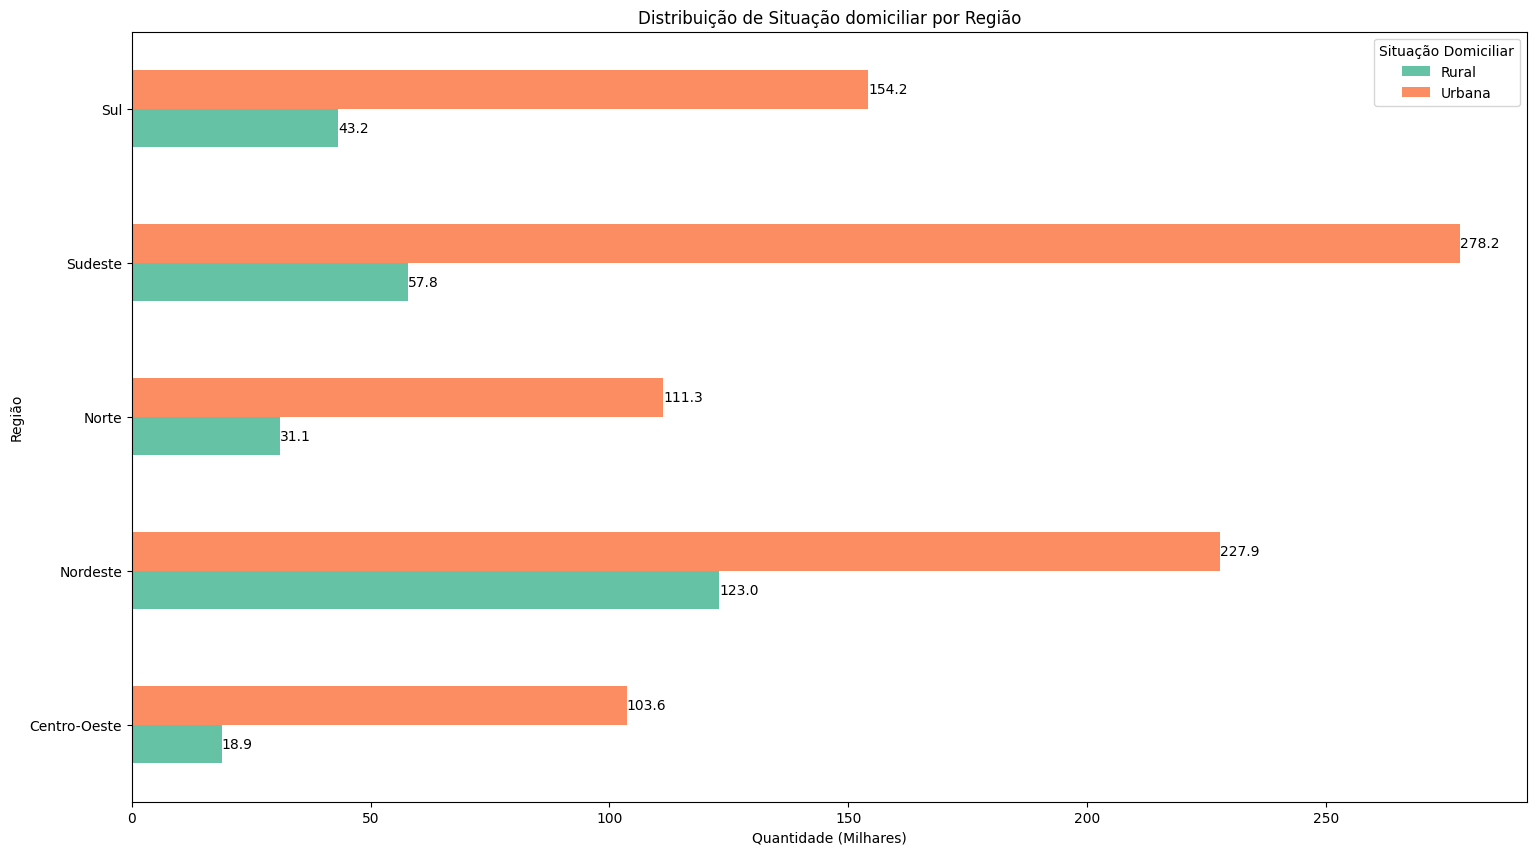

In [ ]:
# Plotando o gráfico
sns.set_palette("Set2")


ax = df_uf_situacao.T.plot(kind="barh", stacked=False, figsize=(18, 10))

plt.title("Distribuição de Situação domiciliar por Região")
plt.xlabel("Quantidade (Milhares)")
plt.ylabel("Região")


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{width:.1f}', (x + width, y + height / 2), va='center')

plt.legend(title="Situação Domiciliar")
plt.show()